In [ ]:
# Peat Soil Pedotransfer Functions (PTFs)

This notebook demonstrates how to use the `peat_ptf` module to estimate
**Mualem–van Genuchten (MVG)** hydraulic parameters for peat soils.

Three approaches are available:

| Method | Source | Description |
|--------|--------|-------------|
| `"ptf"` | Table 4 | Regression equations – continuous prediction from BD, OM, depth |
| `"grouped_mvg"` | Table 5 | MVG-optimised representative values per BD subgroup |
| `"grouped_ptf"` | Table 5 | PTF-derived representative values per BD subgroup |

**Parameters estimated:** θs, α, n, Ks, τ  
**Input variables:** bulk density (BD), organic matter (OM), depth

In [9]:
import sys, os
sys.path.insert(0, os.path.join("..", "src"))

from peat_ptf import (
    MVGParameters,
    get_mvg_parameters,
    ptf_sphagnum,
    ptf_woody,
    ptf_sedge,
    ptf_all_types_high_bd,
    ptf_all_data,
    mvg_grouped_sphagnum,
    mvg_grouped_woody,
    mvg_grouped_sedge,
)

print("peat_ptf module loaded successfully.")

peat_ptf module loaded successfully.


## 1. Type-Specific PTFs (Table 4 – Regression Equations)

These functions compute MVG parameters from continuous input variables using
linear regression equations. Each peat type has its own set of coefficients.

In [10]:
# --- Sphagnum peat (BD ≤ 0.2) ---
params = ptf_sphagnum(BD=0.05, OM=95, depth=10)
print("Sphagnum (BD=0.05, OM=95, depth=10):")
print(f"  θs = {params.theta_s:.4f} cm³/cm³")
print(f"  α  = {params.alpha:.4f} cm⁻¹")
print(f"  n  = {params.n:.4f}")
print(f"  Ks = {params.Ks:.4f} cm/h")
print(f"  τ  = {params.tau:.4f}")

Sphagnum (BD=0.05, OM=95, depth=10):
  θs = 0.9281 cm³/cm³
  α  = 0.3486 cm⁻¹
  n  = 1.4006
  Ks = 10.9187 cm/h
  τ  = -1.6920


In [11]:
# --- Woody peat (BD ≤ 0.2) ---
params = ptf_woody(BD=0.10, depth=20, OM=90)
print("Woody (BD=0.10, depth=20, OM=90):")
print(f"  θs = {params.theta_s:.4f}")
print(f"  α  = {params.alpha:.4f}")
print(f"  n  = {params.n:.4f}")
print(f"  Ks = {params.Ks:.4f}")
print(f"  τ  = {params.tau:.4f}")

Woody (BD=0.10, depth=20, OM=90):
  θs = 0.9063
  α  = 2.3681
  n  = 1.2417
  Ks = 7.6524
  τ  = -4.8400


In [12]:
# --- Sedge peat (BD ≤ 0.2) ---
params = ptf_sedge(BD=0.15, depth=30)
print("Sedge (BD=0.15, depth=30):", params)

# --- All types, high bulk density (BD > 0.2) ---
params = ptf_all_types_high_bd(BD=0.35)
print("All types high BD (BD=0.35):", params)

Sedge (BD=0.15, depth=30): MVGParameters(θs=0.8844, α=0.0620, n=1.2141, Ks=1.4002, τ=0.5000)
All types high BD (BD=0.35): MVGParameters(θs=0.7970, α=0.0142, n=1.1973, Ks=0.0630, τ=0.5000)


## 2. Grouped Parameter Look-ups (Table 5)

Table 5 provides fixed representative MVG parameter sets for bulk-density
subgroups. Two variants exist per group:
- **MVG**: parameters from direct optimisation of the Mualem–van Genuchten model
- **PTF**: parameters derived from the regression PTFs

In [13]:
# MVG-optimised grouped values
print("=== MVG-optimised grouped values ===")
print("Sphagnum (BD=0.03):", mvg_grouped_sphagnum(0.03))
print("Woody    (BD=0.08):", mvg_grouped_woody(0.08))
print("Sedge    (BD=0.05):", mvg_grouped_sedge(0.05))

# Same via the dispatcher
print("\n=== Via get_mvg_parameters (grouped_mvg) ===")
print(get_mvg_parameters(BD=0.03, peat_type="sphagnum", method="grouped_mvg"))
print(get_mvg_parameters(BD=0.08, peat_type="woody",    method="grouped_mvg"))

=== MVG-optimised grouped values ===
Sphagnum (BD=0.03): MVGParameters(θs=0.9300, α=1.3930, n=1.3200, Ks=576.2600, τ=-4.4000)
Woody    (BD=0.08): MVGParameters(θs=0.9600, α=21.3800, n=1.2600, Ks=40.1200, τ=-4.6900)
Sedge    (BD=0.05): MVGParameters(θs=0.9200, α=0.1330, n=1.2800, Ks=nan, τ=nan)

=== Via get_mvg_parameters (grouped_mvg) ===
MVGParameters(θs=0.9300, α=1.3930, n=1.3200, Ks=576.2600, τ=-4.4000)
MVGParameters(θs=0.9600, α=21.3800, n=1.2600, Ks=40.1200, τ=-4.6900)


## 3. Convenience Dispatcher – `get_mvg_parameters()`

The `get_mvg_parameters()` function is the recommended entry point.
It automatically selects the correct equation set based on peat type,
bulk density, and the chosen method.

```python
get_mvg_parameters(
    BD,                    # bulk density (g cm⁻³)  – required
    depth=0.0,             # sample depth (cm)
    OM=None,               # organic matter (wt%)
    peat_type=None,        # "sphagnum", "woody", "sedge", or None
    method="ptf",          # "ptf", "grouped_mvg", or "grouped_ptf"
) -> MVGParameters
```

In [14]:
# Regression PTF (Table 4) – type-specific
print("PTF Sphagnum:", get_mvg_parameters(BD=0.08, depth=5, OM=97, peat_type="sphagnum"))

# Regression PTF (Table 4) – general (no peat type)
print("PTF general: ", get_mvg_parameters(BD=0.10, depth=15))

# Grouped MVG (Table 5)
print("Grouped MVG: ", get_mvg_parameters(BD=0.08, peat_type="woody", method="grouped_mvg"))

# Grouped PTF (Table 5)
print("Grouped PTF: ", get_mvg_parameters(BD=0.03, peat_type="sphagnum", method="grouped_ptf"))

PTF Sphagnum: MVGParameters(θs=0.9150, α=0.2141, n=1.3332, Ks=1.1440, τ=0.3444)
PTF general:  MVGParameters(θs=0.9063, α=0.2026, n=1.3041, Ks=3.5507, τ=-2.2998)
Grouped MVG:  MVGParameters(θs=0.9600, α=21.3800, n=1.2600, Ks=40.1200, τ=-4.6900)
Grouped PTF:  MVGParameters(θs=0.9400, α=0.7840, n=1.4500, Ks=58.4100, τ=-2.9000)


## 4. Visualisation – Parameter Sensitivity to Bulk Density

The plots below show how the predicted MVG parameters change with bulk density
for each peat type (using the Table 4 regression PTFs).

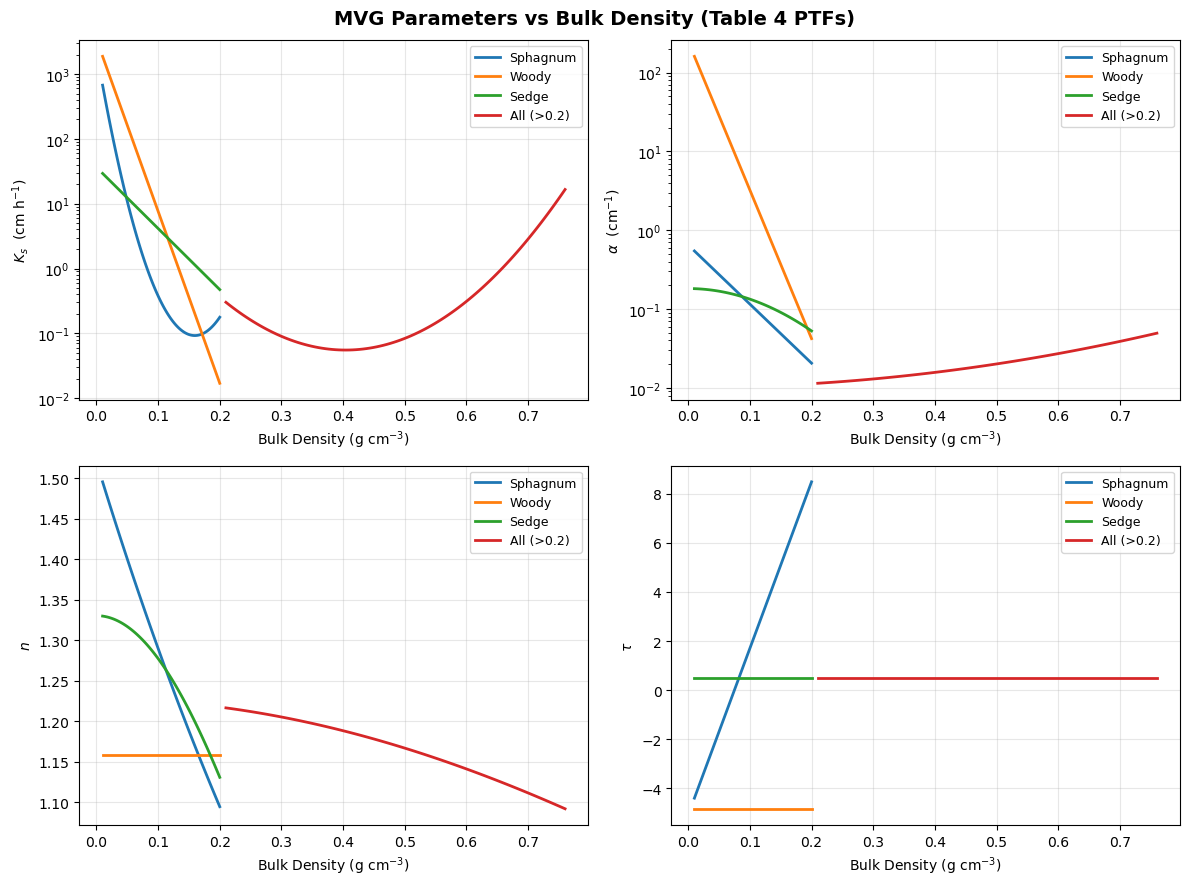

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# BD ranges for low-BD peat types
BD_low = np.linspace(0.01, 0.20, 100)
# BD range for high-BD (all types)
BD_high = np.linspace(0.21, 0.76, 100)

# Fixed auxiliary inputs
OM, depth = 95.0, 15.0

# Compute parameters for each peat type
results = {}
for label, func, bd_arr in [
    ("Sphagnum", lambda bd: ptf_sphagnum(bd, OM, depth), BD_low),
    ("Woody",    lambda bd: ptf_woody(bd, depth, OM),    BD_low),
    ("Sedge",    lambda bd: ptf_sedge(bd, depth),         BD_low),
    ("All (>0.2)", lambda bd: ptf_all_types_high_bd(bd),  BD_high),
]:
    Ks_arr, alpha_arr, n_arr, tau_arr, theta_s_arr = [], [], [], [], []
    for bd in bd_arr:
        p = func(bd)
        theta_s_arr.append(p.theta_s)
        Ks_arr.append(p.Ks)
        alpha_arr.append(p.alpha)
        n_arr.append(p.n)
        tau_arr.append(p.tau)
    results[label] = {
        "BD": bd_arr, "theta_s": theta_s_arr,
        "Ks": Ks_arr, "alpha": alpha_arr, "n": n_arr, "tau": tau_arr,
    }

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharex=False)
param_keys = [("Ks", r"$K_s$  (cm h$^{-1}$)", True),
              ("alpha", r"$\alpha$  (cm$^{-1}$)", True),
              ("n", r"$n$", False),
              ("tau", r"$\tau$", False)]

for ax, (key, ylabel, use_log) in zip(axes.flat, param_keys):
    for label, data in results.items():
        ax.plot(data["BD"], data[key], label=label, linewidth=2)
    ax.set_xlabel("Bulk Density (g cm$^{-3}$)")
    ax.set_ylabel(ylabel)
    if use_log:
        ax.set_yscale("log")
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

fig.suptitle("MVG Parameters vs Bulk Density (Table 4 PTFs)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### Saturated Water Content (θs) vs Bulk Density

θs follows a simple linear relationship with BD across all peat types.

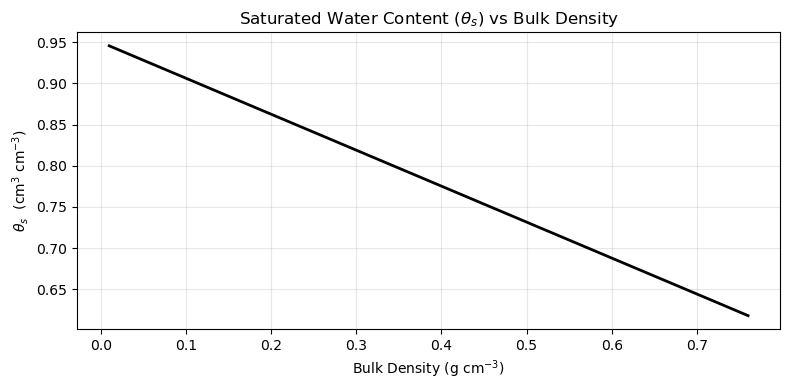

In [16]:
BD_all = np.linspace(0.01, 0.76, 200)
theta_s = 0.950 - 0.437 * BD_all

plt.figure(figsize=(8, 4))
plt.plot(BD_all, theta_s, "k-", linewidth=2)
plt.xlabel("Bulk Density (g cm$^{-3}$)")
plt.ylabel(r"$\theta_s$  (cm$^3$ cm$^{-3}$)")
plt.title(r"Saturated Water Content ($\theta_s$) vs Bulk Density")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Comparing Regression PTF vs Grouped Values

For a given peat type and BD, we can compare the continuous regression
prediction (Table 4) with the discrete grouped values (Table 5).

In [17]:
# Compare Sphagnum PTF regression vs grouped values at several BD points
test_BDs = [0.03, 0.07, 0.12, 0.18]

print(f"{'BD':>6} | {'Method':<12} | {'θs':>6} | {'α':>8} | {'n':>6} | {'Ks':>10} | {'τ':>8}")
print("-" * 72)

for bd in test_BDs:
    ptf = get_mvg_parameters(BD=bd, depth=10, OM=95, peat_type="sphagnum", method="ptf")
    grp = get_mvg_parameters(BD=bd, peat_type="sphagnum", method="grouped_mvg")
    print(f"{bd:6.2f} | {'PTF':<12} | {ptf.theta_s:6.3f} | {ptf.alpha:8.4f} | {ptf.n:6.4f} | {ptf.Ks:10.4f} | {ptf.tau:8.4f}")
    print(f"{'':>6} | {'Grouped MVG':<12} | {grp.theta_s:6.3f} | {grp.alpha:8.4f} | {grp.n:6.4f} | {grp.Ks:10.4f} | {grp.tau:8.4f}")
    print("-" * 72)

    BD | Method       |     θs |        α |      n |         Ks |        τ
------------------------------------------------------------------------
  0.03 | PTF          |  0.937 |   0.4923 | 1.4474 |    73.1249 |  -3.0496
       | Grouped MVG  |  0.930 |   1.3930 | 1.3200 |   576.2600 |  -4.4000
------------------------------------------------------------------------
  0.07 | PTF          |  0.919 |   0.2469 | 1.3553 |     2.2411 |  -0.3344
       | Grouped MVG  |  0.930 |   0.1630 | 1.2500 |   718.9200 |  -1.7900
------------------------------------------------------------------------
  0.12 | PTF          |  0.898 |   0.1042 | 1.2483 |     0.1721 |   3.0596
       | Grouped MVG  |  0.910 |   0.2220 | 1.2100 |        nan |      nan
------------------------------------------------------------------------
  0.18 | PTF          |  0.871 |   0.0370 | 1.1310 |     0.1092 |   7.1324
       | Grouped MVG  |  0.910 |   0.2220 | 1.2100 |        nan |      nan
---------------------------------